# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:
# determinando as duas variáveis para análise
tab = pd.crosstab(df['sex'], df['flag_doente'], margins='All') # tab cruzada
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [26]:
# adicionando novas informações a tab cruzada
tab['media'] = tab.iloc[2,1]/2 #media
tab['chance'] = tab[1]/tab[0]  #odds
tab['RC_vs_male'] = tab['chance']/tab.loc[1.0,'chance']  # Odds RC
tab['logito'] = np.log(tab['chance'])
tab['woe'] = np.log(tab['RC_vs_male'])

In [27]:
tab

flag_doente,0,1,All,media,chance,RC_vs_male,logito,woe
sex,,,,,,,,
0.0,72,25,97,69.5,0.347222,0.280214,-1.057790,-1.272200
1.0,92,114,206,69.5,1.239130,1.000000,0.214410,0.000000
All,164,139,303,69.5,0.847561,0.683997,-0.165392,-0.379802


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [29]:
df['age'].max()

77.0

In [30]:
df['age'].min()

29.0

In [36]:
bins = [29, 40, 50, 60, 80]
df['faixa_etaria'] = pd.cut(df['age'], bins)

In [55]:
# tab cruzada
tab = pd.crosstab(df['faixa_etaria'], df['flag_doente'], margins='All')
# informações 
tab['chance'] = tab[1]/tab[0]  #odds
tab['RC_vs_male'] = tab['chance']/tab.iloc[1,3]  # Odds RC
tab['logito'] = np.log(tab['chance'])
tab['woe'] = np.log(tab['RC_vs_male'])
tab.reset_index(inplace=True)
tab['média'] = tab.groupby('faixa_etaria')[1].transform('mean')

In [56]:
tab

flag_doente,faixa_etaria,0,1,All,chance,RC_vs_male,logito,woe,média
0,"(29, 40]",11,6,17,0.545455,1.256917,-0.606136,0.228662,6.0
1,"(40, 50]",53,23,76,0.433962,1.000000,-0.834798,0.000000,23.0
2,"(50, 60]",64,66,130,1.031250,2.376359,0.030772,0.865569,66.0
3,"(60, 80]",35,44,79,1.257143,2.896894,0.228842,1.063639,44.0
4,All,163,139,302,0.852761,1.965057,-0.159276,0.675521,139.0


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<AxesSubplot:xlabel='faixa_etaria', ylabel='média'>

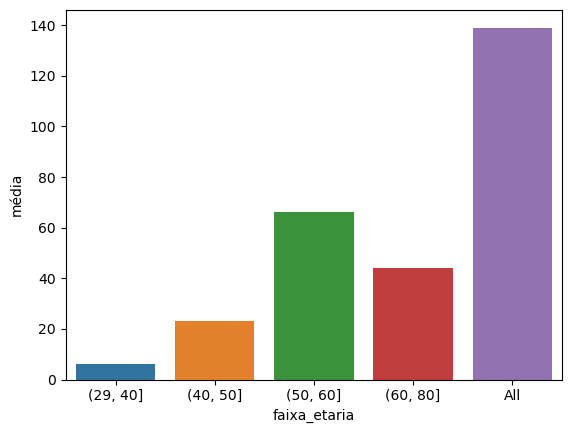

In [59]:
sns.barplot(x='faixa_etaria', y='média', data=tab)